In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [ ]:
# Creates single NetCDF file containing all OISST files in the clidex server
ssts = xr.open_mfdataset("/vast/clidex/data/obs/SST/OISST/OISSTv2.1/sst.day.mean.????.nc")
ssts.coords['lon'] = (ssts.coords['lon'] + 180) % 360 - 180
ssts = ssts.sortby(ssts.lon)
# Cut out North Atlantic and save
north_atlantic = ssts[["sst"]].sel(lat=slice(-10,80), lon=slice(-120,60)).load()
north_atlantic.to_netcdf(path="sst_data/sst.day.mean.1982-2024.na.nc")

In [2]:
# Create time serie of North Atlantic Basin SSTs
ssts = xr.open_dataset("sst_data/sst.day.mean.1982-2024.na.nc")
avg_ssts = ssts.sel(lat=slice(0,70), lon=slice(-80,10)).load()
avg_ssts = avg_ssts.mean(["lat","lon"])

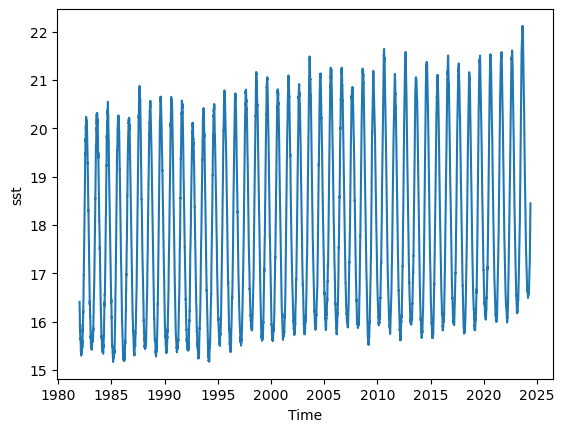

In [3]:
avg_ssts.sst.plot()